# The Story Behind Germany’s Rising Housing Prices

## Abstract

The German Real Estate Index (GREIX) offers a comprehensive, transaction-level perspective of how housing prices have changed in some of the largest German cities and by property types through time. 

This project examines how housing prices, inflation, and interest rates relate to one another in terms of affordability and investment potential. We study city-level trends as well as the national trends in order to demonstrate that markets such as Munich and Frankfurt and Potsdam continue to outperform all other markets in Germany, with more simply moderate cyclical growth occurring across small market areas.

Interactive visualizations of property types show differing parameters of price development, with apartments having the steeper prices due to urbanization.
By integrating secondary macroeconomic data, such as inflation and interest rates, the analysis offers a comprehensive view of the economic forces driving price movements

### One line Abstract

Germany’s housing prices have steadily risen for decades, driven by urban demand, inflation, and interest rate shifts that make home ownership increasingly challenging

## Our Audience

1. Urban Policy Analyst

Who Works in a city planning department in Berlin and cares about understanding how housing prices relate to inflation and income levels. He/She Uses the report to inform housing affordability strategies and public policy design.

2. Real Estate Investor

A Private investor interested in long-term housing trends who is focused on identifying which cities and property types have strong growth potential.

3. Academic or Student 

University professor or data science student interested in data-driven storytelling who uses this report as an example of combining economic data, visualization, and machine learning to extract insight from real-world housing data.

In [4]:

# 1. Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import sys
!"{sys.executable}" -m pip install plotly


In [5]:
#Read CSV

df = pd.read_excel("GREIX_all_cities_data.xlsx")


display(df.head(10))

,Year,Quarter,City,Property_Type,Index,Price,Inflation
0,1963,1.0,Hamburg,Single-family house,NaN,1200.0,1
1,1963,1.0,Hamburg,Single-family house,NaN,400.0,0
2,1963,2.0,Hamburg,Single-family house,NaN,300.0,0
3,1963,2.0,Hamburg,Single-family house,NaN,1100.0,1
4,1963,3.0,Hamburg,Single-family house,NaN,400.0,0
5,1963,3.0,Hamburg,Single-family house,NaN,1200.0,1
6,1963,4.0,Hamburg,Single-family house,NaN,300.0,0
7,1963,4.0,Hamburg,Single-family house,NaN,900.0,1
8,1963,NaN,Hamburg,Single-family house,NaN,1100.0,1
9,1963,NaN,Hamburg,Single-family house,NaN,300.0,0


In [6]:
# Basic structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21058 entries, 0 to 21057
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           21058 non-null  int64  
 1   Quarter        15984 non-null  float64
 2   City           21058 non-null  object 
 3   Property_Type  21058 non-null  object 
 4   Index          20210 non-null  float64
 5   Price          18180 non-null  float64
 6   Inflation      21058 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [7]:
print("\nShape of dataset:", df.shape)




Shape of dataset: (21058, 7)


In [8]:
print("\nMissing values per column:\n", df.isna().sum())



Missing values per column:
 Year                0
Quarter          5074
City                0
Property_Type       0
Index             848
Price            2878
Inflation           0
dtype: int64


In [9]:
print("\nUnique cities:", df['City'].nunique())
df['City'].unique()


Unique cities: 23


array(['Hamburg', 'Berlin', 'GREIX', 'Cologne', 'Dortmund', 'Duisburg',
       'Munich', 'Duesseldorf', 'North Rhine-Westphalia', 'Wiesbaden',
       'Frankfurt', 'Muenster', 'Stuttgart', 'Dresden', 'Karlsruhe',
       'Chemnitz', 'Luebeck', 'Bonn', 'Erfurt', 'Kreis Mettmann',
       'Potsdam', 'Rhein-Erft-Kreis', 'Leipzig'], dtype=object)

In [10]:
# Count missing values per city for each relevant column
missing_by_city = (
    df.groupby("City")[["Price"]]
      .apply(lambda x: x.isna().sum())
      .sort_values(by="Price", ascending=False)
)

print("Missing values by City:")
print(missing_by_city)


Missing values by City:
                        Price
City                         
Berlin                   1622
Duisburg                  450
Cologne                   138
Erfurt                    134
Bonn                       78
Frankfurt                  72
Karlsruhe                  68
Wiesbaden                  68
Muenster                   66
Dortmund                   58
Chemnitz                   50
Hamburg                    46
Luebeck                    12
Potsdam                     8
Duesseldorf                 6
Dresden                     2
Leipzig                     0
GREIX                       0
Kreis Mettmann              0
North Rhine-Westphalia      0
Munich                      0
Rhein-Erft-Kreis            0
Stuttgart                   0


“Since Berlin accounts for over 50% of all missing Price observations and exhibits a systematically incomplete pattern, we exclude it from the main analysis to avoid biasing our findings. The city will be treated separately for qualitative interpretation.”

In [11]:
#Exclude berlin from our data

df_clean = df[df["City"] != "Berlin"].copy()

print("\nDataset after excluding Berlin:")
print("Remaining cities:", df_clean["City"].nunique())
print("New shape:", df_clean.shape)


Dataset after excluding Berlin:
Remaining cities: 22
New shape: (19436, 7)


Since housing prices evolve smoothly over time, we can interpolate missing values linearly within each city.

In [12]:
# Fill Missing Prices Within Each City Over Time

df_clean["Price"] = (
    df_clean.groupby("City")["Price"]
            .transform(lambda x: x.interpolate(method="linear"))
)

In case some cities still have small gaps, we fill them using the median price of the same property type within that city.

In [13]:
df_clean.isnull().sum()

Year                0
Quarter          4752
City                0
Property_Type       0
Index             848
Price             388
Inflation           0
dtype: int64

In [14]:
# Fill Any Remaining Missing Values by Property Type Median

df_clean["Price"] = (
    df_clean.groupby(["City", "Property_Type"])["Price"]
            .transform(lambda x: x.fillna(x.median()))
)

In [15]:
# Re-check missing prices per city 

check_missing = (
    df_clean.groupby("City")["Price"]
            .apply(lambda x: x.isna().sum())
            .sort_values(ascending=False)
)

print("\nRemaining missing prices (should all be 0):")
display(check_missing)


Remaining missing prices (should all be 0):


City
Bonn                      0
Chemnitz                  0
Cologne                   0
Dortmund                  0
Dresden                   0
Duesseldorf               0
Duisburg                  0
Erfurt                    0
Frankfurt                 0
GREIX                     0
Hamburg                   0
Karlsruhe                 0
Kreis Mettmann            0
Leipzig                   0
Luebeck                   0
Muenster                  0
Munich                    0
North Rhine-Westphalia    0
Potsdam                   0
Rhein-Erft-Kreis          0
Stuttgart                 0
Wiesbaden                 0
Name: Price, dtype: int64

# EDA


### Overall distribution of Housing prices

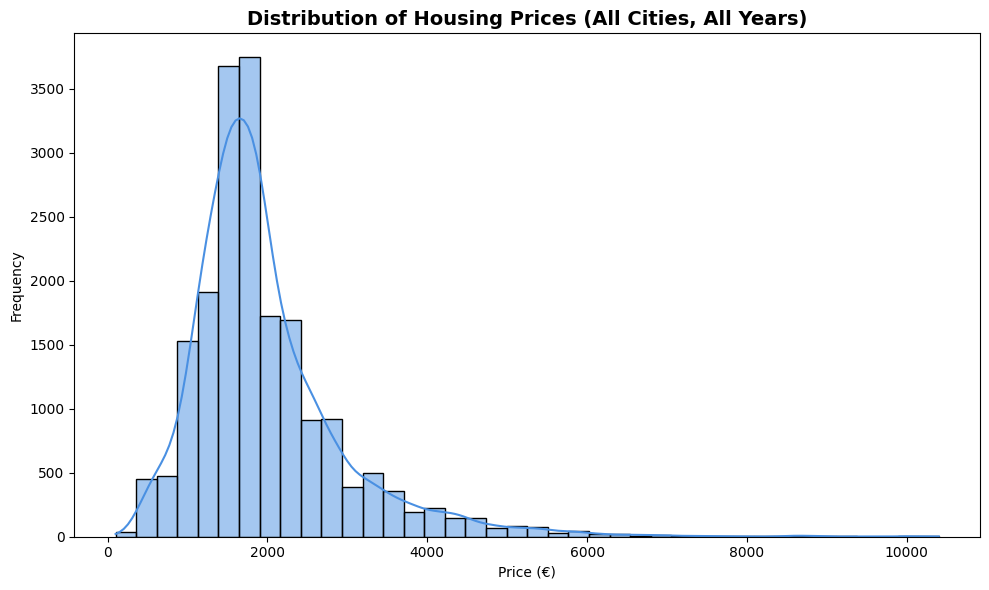

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["Price"], bins=40, kde=True, color="#4A90E2")
plt.title("Distribution of Housing Prices (All Cities, All Years)", fontsize=14, fontweight="bold")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Price Distribution Across Property Types

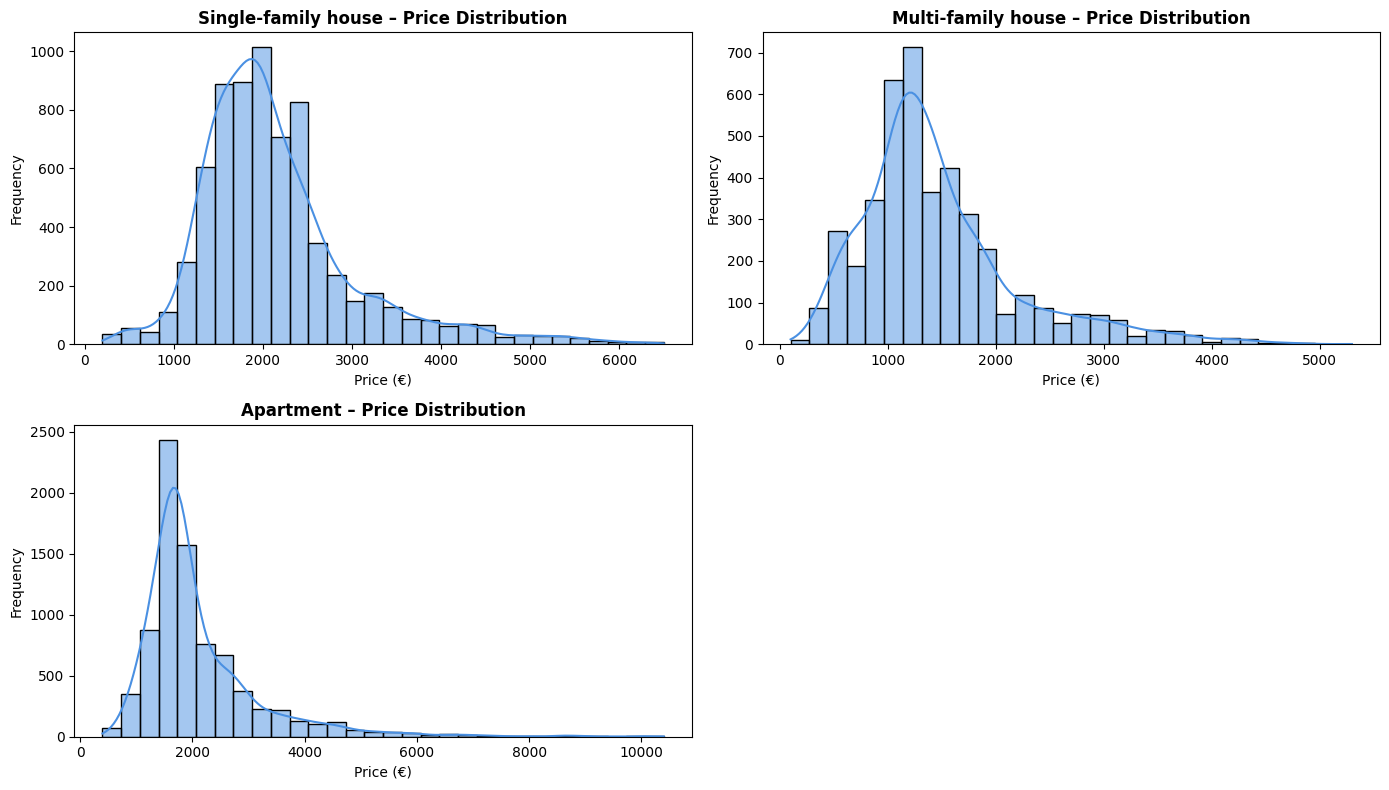

In [17]:
property_types = df_clean["Property_Type"].unique()

plt.figure(figsize=(14, 8))

for i, ptype in enumerate(property_types, 1):
    plt.subplot(2, 2, i)  
    subset = df_clean[df_clean["Property_Type"] == ptype]
    sns.histplot(subset["Price"], bins=30, kde=True, color="#4A90E2")
    plt.title(f"{ptype} – Price Distribution", fontsize=12, fontweight="bold")
    plt.xlabel("Price (€)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

We focus on annual average prices since 'Index' represents relative values and also we will focus on year base analysis in our data storytelling.

In [18]:
# Aggregate Data by Year, City, and Property Type


yearly_prices = (
    df_clean.groupby(["Year", "City", "Property_Type"], as_index=False)
            .agg({
                "Price": "mean",
                "Inflation": "mean"
            })
)

# Verify the structure

print("Shape of yearly dataset:", yearly_prices.shape)
display(yearly_prices.head(10))

Shape of yearly dataset: (2422, 5)


,Year,City,Property_Type,Price,Inflation
0,1963,Hamburg,Single-family house,720.0,0.5
1,1964,Hamburg,Apartment,800.0,0.5
2,1964,Hamburg,Multi-family house,800.0,0.5
3,1964,Hamburg,Single-family house,790.0,0.5
4,1965,GREIX,Apartment,850.0,0.5
5,1965,GREIX,Multi-family house,250.0,0.5
6,1965,GREIX,Single-family house,850.0,0.5
7,1965,Hamburg,Apartment,500.0,0.5
8,1965,Hamburg,Multi-family house,500.0,0.5
9,1965,Hamburg,Single-family house,900.0,0.5


### Housing Price Trends Across German Cities

C:\Users\Mustafa Ansari\AppData\Local\Temp\ipykernel_3752\3324523143.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


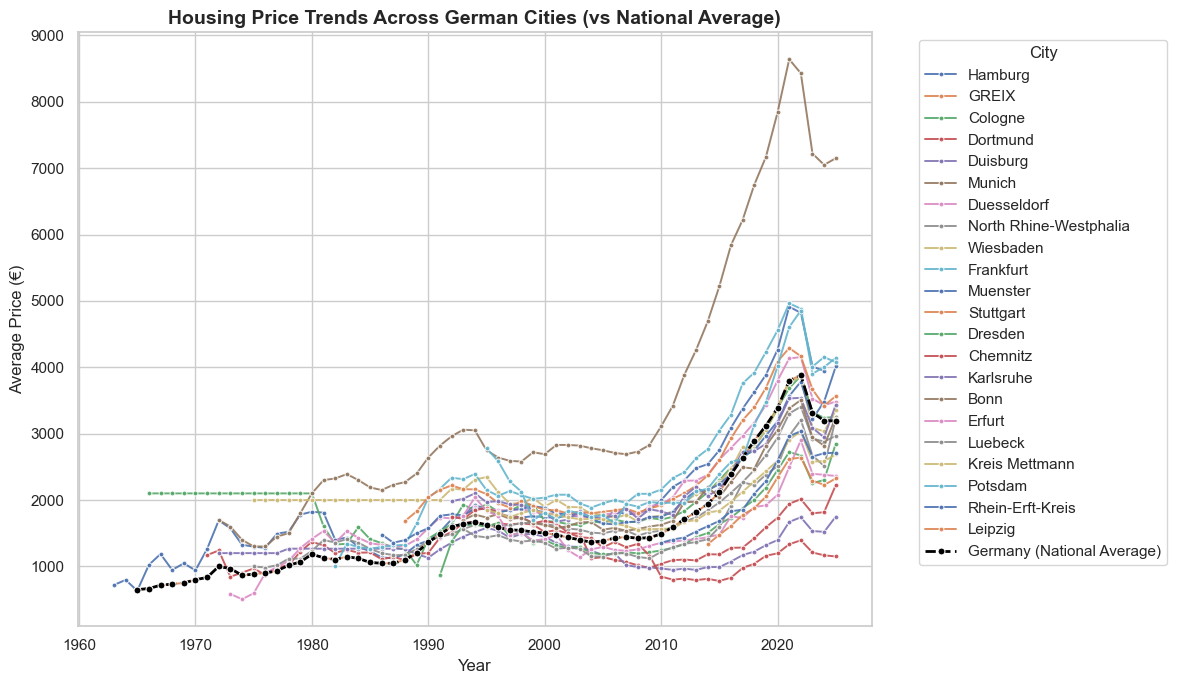

In [19]:

sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 7))

# Plot each city with dots
for city in yearly_prices["City"].unique():
    df_city = yearly_prices[yearly_prices["City"] == city]
    sns.lineplot(
        data=df_city,
        x="Year",
        y="Price",
        marker="o",
        markersize=3.5,
        linewidth=1.4,
        alpha=0.9,
        errorbar=None,      
        label=city
    )

# Add national average (GREIX)
df_greix = yearly_prices[yearly_prices["City"] == "GREIX"]
sns.lineplot(
    data=df_greix,
    x="Year",
    y="Price",
    marker="o",
    color="black",
    linestyle="--",
    linewidth=2,
    markersize=5,
    label="Germany (National Average)",
    ci=None
)

# Title & labels
plt.title("Housing Price Trends Across German Cities (vs National Average)",
          fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Average Price (€)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Top 3 Cities with Housing Prices Above the National Average

C:\Users\Mustafa Ansari\AppData\Local\Temp\ipykernel_3752\3240143614.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Price"] - x["GREIX_Avg"]).mean())


Top 3 cities above national average: ['Munich', 'Frankfurt', 'Potsdam']


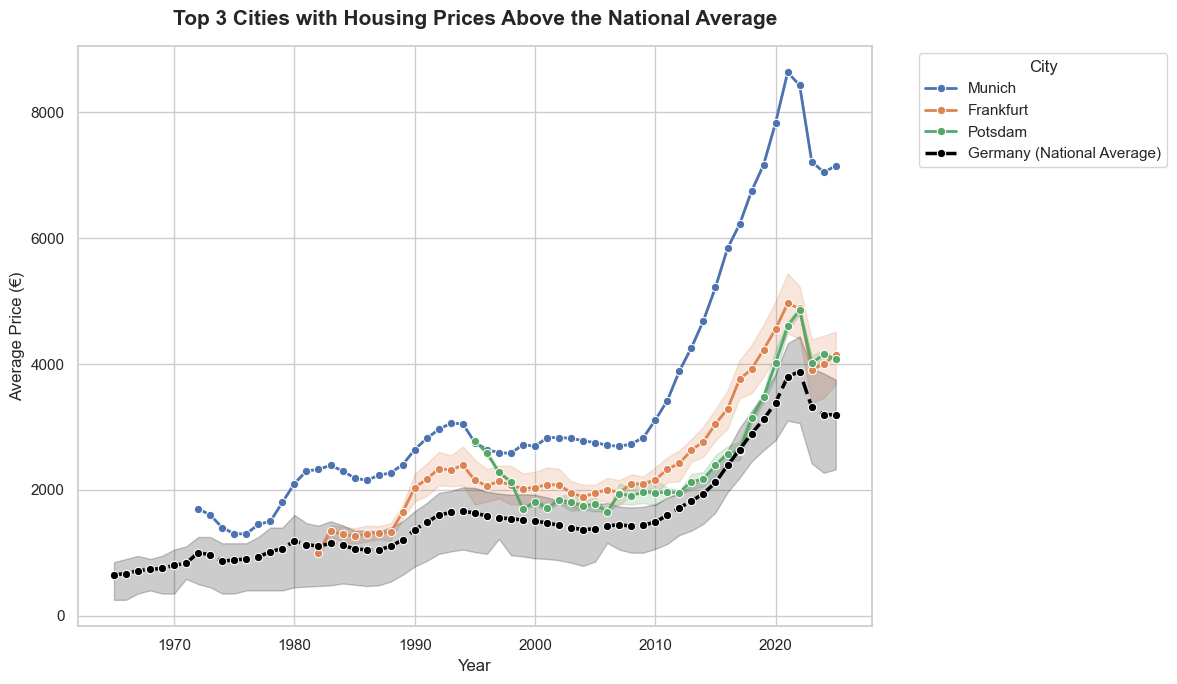

In [20]:


# Compute the national average (GREIX)
df_greix = yearly_prices[yearly_prices["City"] == "GREIX"][["Year", "Price"]].rename(columns={"Price": "GREIX_Avg"})

# Merge national average back to the city-level data
df_compare = yearly_prices.merge(df_greix, on="Year", how="left")

# Calculate how much each city exceeds the national average
city_mean_diff = (
    df_compare.groupby("City")
    .apply(lambda x: (x["Price"] - x["GREIX_Avg"]).mean())
    .sort_values(ascending=False)
)

# Top 3 cities consistently above the national average
top_cities = city_mean_diff.head(3).index.tolist()
print("Top 3 cities above national average:", top_cities)

# Filter dataset for these top cities
df_top = df_compare[df_compare["City"].isin(top_cities)]

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Plot top 3 cities
for city in top_cities:
    subset = df_top[df_top["City"] == city]
    sns.lineplot(
        data=subset,
        x="Year",
        y="Price",
        marker="o",
        linewidth=2,
        label=city
    )

# Plot national average for comparison
sns.lineplot(
    data=df_greix,
    x="Year",
    y="GREIX_Avg",
    color="black",
    linestyle="--",
    linewidth=2.5,
    marker="o",
    label="Germany (National Average)"
)

# Titles and labels
plt.title("Top 3 Cities with Housing Prices Above the National Average",
          fontsize=15, fontweight="bold", pad=15)
plt.xlabel("Year")
plt.ylabel("Average Price (€)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Bottom 3 Cities with Housing Prices Below the National Average

C:\Users\Mustafa Ansari\AppData\Local\Temp\ipykernel_3752\1996513449.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Price"] - x["GREIX_Avg"]).mean())


Bottom 3 cities below national average: ['Leipzig', 'Chemnitz', 'Rhein-Erft-Kreis']


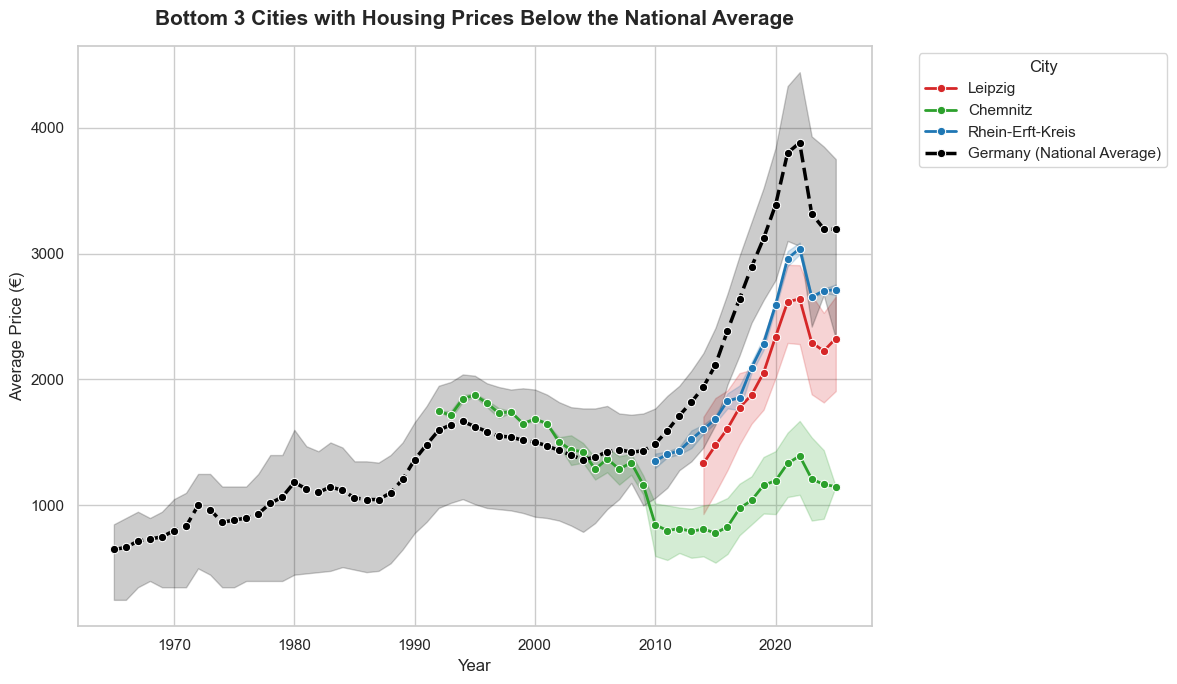

In [21]:
# Compute national average (GREIX)
df_greix = yearly_prices[yearly_prices["City"] == "GREIX"][["Year", "Price"]].rename(columns={"Price": "GREIX_Avg"})

# Merge with city-level data
df_compare = yearly_prices.merge(df_greix, on="Year", how="left")

# Calculate mean difference (city price - national average)
city_mean_diff = (
    df_compare.groupby("City")
    .apply(lambda x: (x["Price"] - x["GREIX_Avg"]).mean())
    .sort_values(ascending=True)
)

# Select bottom 3 cities (most below national average)
bottom_cities = city_mean_diff.head(3).index.tolist()
print("Bottom 3 cities below national average:", bottom_cities)

# Filter data for bottom 3 cities
df_bottom = df_compare[df_compare["City"].isin(bottom_cities)]

# Define consistent colors (choose distinctive but harmonious colors)
city_palette_bottom = {
    bottom_cities[0]: "#d62728",  # red tone
    bottom_cities[1]: "#2ca02c",  # green tone
    bottom_cities[2]: "#1f77b4",  # blue tone
    "Germany (National Average)": "black"
}

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Plot bottom 3 cities
for city in bottom_cities:
    subset = df_bottom[df_bottom["City"] == city]
    sns.lineplot(
        data=subset,
        x="Year",
        y="Price",
        marker="o",
        linewidth=2,
        label=city,
        color=city_palette_bottom[city]
    )

# Add national average
sns.lineplot(
    data=df_greix,
    x="Year",
    y="GREIX_Avg",
    color="black",
    linestyle="--",
    linewidth=2.5,
    marker="o",
    label="Germany (National Average)"
)

# Titles and labels
plt.title("Bottom 3 Cities with Housing Prices Below the National Average",
          fontsize=15, fontweight="bold", pad=15)
plt.xlabel("Year")
plt.ylabel("Average Price (€)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Geographical Heatmap of Average Prices Across German Cities

In [40]:
# Compute Average Price per City
city_avg = (
    yearly_prices.groupby("City", as_index=False)["Price"]
    .mean()
    .rename(columns={"Price": "Average_Price"})
)

# Coordinates for All 22 Cities (excluding Berlin)
city_coords = {
    "Hamburg": [53.5511, 9.9937],
    "Cologne": [50.9375, 6.9603],
    "Dortmund": [51.5136, 7.4653],
    "Duisburg": [51.4344, 6.7623],
    "Munich": [48.1351, 11.5820],
    "Duesseldorf": [51.2277, 6.7735],
    "North Rhine-Westphalia": [51.4332, 7.6616],
    "Wiesbaden": [50.0782, 8.2398],
    "Frankfurt": [50.1109, 8.6821],
    "Muenster": [51.9607, 7.6261],
    "Stuttgart": [48.7758, 9.1829],
    "Dresden": [51.0504, 13.7373],
    "Karlsruhe": [49.0069, 8.4037],
    "Chemnitz": [50.8278, 12.9214],
    "Luebeck": [53.8655, 10.6866],
    "Bonn": [50.7374, 7.0982],
    "Erfurt": [50.9848, 11.0299],
    "Kreis Mettmann": [51.2500, 6.9500],
    "Potsdam": [52.3906, 13.0645],
    "Rhein-Erft-Kreis": [50.9333, 6.7000],
    "Leipzig": [51.3397, 12.3731],
}

# Merge Coordinates
city_avg["Latitude"] = city_avg["City"].map(lambda x: city_coords.get(x, [None, None])[0])
city_avg["Longitude"] = city_avg["City"].map(lambda x: city_coords.get(x, [None, None])[1])

# Remove cities without coordinates (if any)
city_avg = city_avg.dropna(subset=["Latitude", "Longitude"])

# Plotly Map
fig = px.scatter_mapbox(
    city_avg,
    lat="Latitude",
    lon="Longitude",
    color="Average_Price",
    size="Average_Price",
    color_continuous_scale="Reds",
    hover_name="City",
    hover_data={"Average_Price": ":.0f"},
    zoom=5.5,
    title="Average Housing Prices Across German Cities",
)

# Layout Settings
fig.update_layout(
    mapbox_style="carto-positron",
    title_font_size=18,
    title_x=0.5,
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Avg Price (€)")
)

fig.show()


C:\Users\Mustafa Ansari\AppData\Local\Temp\ipykernel_27528\1350284876.py:41: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### Yearly Housing Price Trends by Property Type

In [38]:


# Filter to GREIX (national average)
df_greix_yearly = yearly_prices[yearly_prices["City"] == "GREIX"].copy()

# Group by year and property type
df_filtered = (
    df_greix_yearly.groupby(["Year", "Property_Type"])["Price"]
    .mean()
    .reset_index()
)

# Create interactive Plotly line chart
fig = px.line(
    df_filtered,
    x="Year",
    y="Price",
    color="Property_Type",
    markers=True,
    title="Yearly Housing Price Trends by Property Type (Germany - GREIX)",
    labels={
        "Year": "Year",
        "Price": "Average Price (€)",
        "Property_Type": "Property Type"
    },
    hover_data={"Price": ":.2f", "Year": True}
)

# Layout styling
fig.update_layout(
    template="plotly_white",
    title_font_size=18,
    title_x=0.5,
    legend_title_text="Property Type",
    hovermode="x unified",
    height=600,
    width=1100
)

fig.show()




### Multi-Family House Prices (Cities vs National Average)

In [37]:
# Filter Multi-family house data (city and national)
df_city = yearly_prices[yearly_prices["Property_Type"] == "Multi-family house"].copy()
df_national = df_city[df_city["City"] == "GREIX"].copy()
df_cities = df_city[df_city["City"] != "GREIX"].copy()

# Group data by year
df_city_grouped = df_cities.groupby(["Year", "City"])["Price"].mean().reset_index()
df_national_grouped = (
    df_national.groupby("Year")["Price"].mean().reset_index().assign(City="Germany (National Average)")
)

# Combine both datasets
df_combined = pd.concat([df_city_grouped, df_national_grouped], ignore_index=True)

# Plot interactive line chart
fig = px.line(
    df_combined,
    x="Year",
    y="Price",
    color="City",
    title=" Multi-family House Prices: German Cities vs National Average",
    labels={
        "Year": "Year",
        "Price": "Average Price (€)",
        "City": "City"
    },
    markers=True,
    hover_data={"Price": ":.2f", "Year": True}
)

# Highlight national average line
fig.update_traces(
    selector=lambda trace: trace.name == "Germany (National Average)",
    line=dict(color="black", dash="dash", width=3),
    marker=dict(color="black", size=7)
)

# Layout and style
fig.update_layout(
    template="plotly_white",
    title_font_size=18,
    title_x=0.5,
    legend_title_text="City",
    hovermode="x unified",
    height=600,
    width=1100
)

fig.show()


### Single-Family House Prices (Cities vs National Average)

In [24]:
# Filter Single-family house data
df_sfh = yearly_prices[yearly_prices["Property_Type"] == "Single-family house"].copy()
df_greix_sfh = df_sfh[df_sfh["City"] == "GREIX"].copy()
df_city_sfh = df_sfh[df_sfh["City"] != "GREIX"].copy()

# Group city and national data by year
df_city_grouped = df_city_sfh.groupby(["Year", "City"])["Price"].mean().reset_index()
df_national_grouped = (
    df_greix_sfh.groupby("Year")["Price"].mean().reset_index().assign(City="Germany (National Average)")
)

# Combine both datasets
df_combined = pd.concat([df_city_grouped, df_national_grouped], ignore_index=True)

#  Plot interactive line chart
fig = px.line(
    df_combined,
    x="Year",
    y="Price",
    color="City",
    title="Single-Family House Prices: German Cities vs National Average",
    labels={
        "Year": "Year",
        "Price": "Average Price (€)",
        "City": "City"
    },
    markers=True,
    hover_data={"Price": ":.2f", "Year": True}
)

# Highlight national average
fig.update_traces(
    selector=lambda trace: trace.name == "Germany (National Average)",
    line=dict(color="black", dash="dash", width=3),
    marker=dict(color="black", size=7)
)

# Layout styling
fig.update_layout(
    template="plotly_white",
    title_font_size=20,
    title_x=0.5,
    legend_title_text="City",
    hovermode="x unified",
    legend=dict(
        title_font=dict(size=12),
        font=dict(size=11),
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        bordercolor="LightGrey",
        borderwidth=1
    ),
    margin=dict(r=220),
    height=700,
    width=1300
)

fig.show()


In [ ]:
# Filter Apartment data
df_apartment = yearly_prices[yearly_prices["Property_Type"] == "Apartment"].copy()
df_greix_apartment = df_apartment[df_apartment["City"] == "GREIX"].copy()
df_city_apartment = df_apartment[df_apartment["City"] != "GREIX"].copy()

# Group by year for cities and national average
df_city_grouped = df_city_apartment.groupby(["Year", "City"])["Price"].mean().reset_index()
df_national_grouped = (
    df_greix_apartment.groupby("Year")["Price"].mean().reset_index().assign(City="Germany (National Average)")
)

# Combine both datasets
df_combined = pd.concat([df_city_grouped, df_national_grouped], ignore_index=True)

# Plot interactive line chart
fig = px.line(
    df_combined,
    x="Year",
    y="Price",
    color="City",
    title=" Apartment Prices: German Cities vs National Average",
    labels={
        "Year": "Year",
        "Price": "Average Price (€)",
        "City": "City"
    },
    markers=True,
    hover_data={"Price": ":.2f", "Year": True}
)

# Highlight national average
fig.update_traces(
    selector=lambda trace: trace.name == "Germany (National Average)",
    line=dict(color="black", dash="dash", width=3),
    marker=dict(color="black", size=7)
)

# Layout styling
fig.update_layout(
    template="plotly_white",
    title_font_size=20,
    title_x=0.5,
    legend_title_text="City",
    hovermode="x unified",
    legend=dict(
        title_font=dict(size=12),
        font=dict(size=11),
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        bordercolor="LightGrey",
        borderwidth=1
    ),
    margin=dict(r=220),
    height=700,
    width=1300
)

fig.show()
